In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("merc.xlsx")

In [3]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


# Veriyi Anlamak

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
#13.119 veri
#Ortalama 2017 yılına ait araba var

In [6]:
df.isnull().sum()
#Hangi kolonda kac tane null veri var?

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

# Grafiksel Analizler

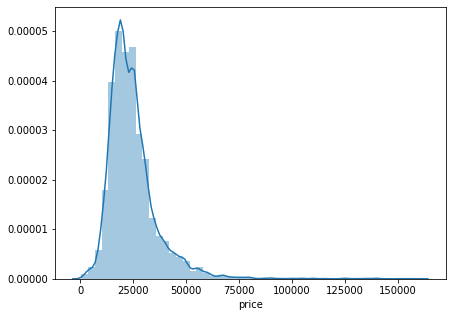

In [7]:
plt.figure(figsize = (7,5))
sbn.distplot(df["price"])
#distribution-> dagilim

Grafigi yorumlayalim;
Simdi grafige bakarsak 0 civarlarinda baslamis. Tamam
Bir yere kadar yukselmis. Tamam
Sonra bir dusus var. Tamam
Ama grafigin bitmesi taa 150.000 lere gitmis ve grafigin  hemen hemen simetrik bir sekilde dusunursek 50.000-75.000 bitmesini isterdik. Demek ki burda bir sorun var iste

Neden? Bizim veri setimizin ortalamasi aslinda 25.000 lerde ama fiyati 75.000 u geckin muhtemelen 50-100 araba var. Bu arabalar yuzunden veri setimizle calisirken sorun cikarabilir

Is hayatini dusunursek eger islemlerimizi soyle yapradik
Hem verileri silmeyiz yolumuza boylece devam ederiz hem de bu absurt verileri silip oyle bi denerdik

Ama biz burda verileri cikartip deneyelim dedik


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

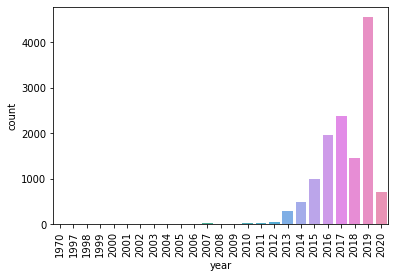

In [8]:
#Hangi yildan ne kadar veri var bakalim
#Bir seyin kac sayida olduguna bakmak icin=countplot islevseldir
sbn.countplot(df["year"])
plt.xticks(rotation = 'vertical')

In [9]:
#Burdan cok byuk bi cikarim yapmadik su an

In [10]:
#Simdi de verilerin birbirleri arasindaki korelasyona(iliskilerine bakalim)

In [11]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [12]:
#Burda bizi asil ilgilendiren fiyat ve digerleri arasindaki
#iliski. Cunku tahminleri orda yapcaz

In [13]:
df.corr()["price"].sort_values()
#sort ile en negatif iliskiden en pozitif iliskiye gore siraladik

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [14]:
#Burda fiyati en cok etkileyen yil oldugunu gorduk
#Yani yil, motorSize ve vergi(tax) arttikca fiyat da artiyomus
#mpg(mil basina yaktigi benzin galon) ve mileage(yani araba kac kilometreseyse)
#arttikca da fiyatlar dusuyomus

# En Yuksek Fiyatli Arabalarin Tespiti

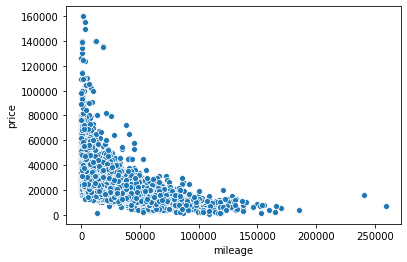

In [15]:
sbn.scatterplot(x = "mileage", y = "price", data = df)

In [16]:
#Kilometre arttikca fiyat azaliyo

In [17]:
df.sort_values("price", ascending = False).head(20)
#ascending ->False=En yuksek fiyati en yukariya getirecek
#ascending ->True=En dusuk fiyati en yukariya getirecek

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [18]:
df.sort_values("price", ascending = True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [19]:
df["transmission"].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [20]:
len(df)

13119

In [21]:
len(df) * 0.01

131.19

In [22]:
#Biz yuksek fiyatli arabalari dataset ten atmak istiyoruz
#ya, dedik ki biz bu veri setinin %99 unu alsak sadece
#gayet de guzel sınuclar alabiliriz. O halde geriye kalan 
#%1 lik yani 131 tane yuksek fiyatli veriyi atalim
#Boylece daha dogru bir seyler bulabilirz dedik

# Veri Temizligi

In [23]:
temizDf = df.sort_values("price", ascending = False).iloc[131:]

In [24]:
temizDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [25]:
#fiyat ortalamasi 25 binlerden 24 binlere dusmus. Bu guzel
#Veri sildik ama ortalama cok etkilenmedi. Hem de max
#fiyat silindi daha guzel oldu

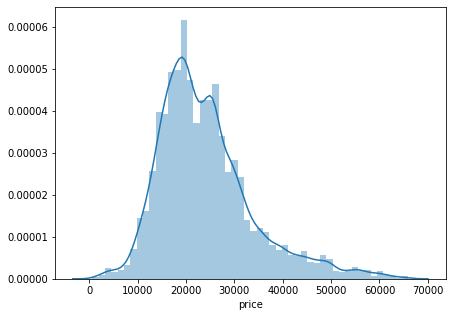

In [26]:
plt.figure(figsize = (7,5))
sbn.distplot(temizDf["price"])

In [27]:
#Bu yeterli. Normal dagilim olsun diye de cok kirparsak
#Veri seti bozulur

In [28]:
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [29]:
#1970 te uretilen bir araba 25 bin pound oldugu cikti
#Bu da gereksiz bir durum oldugunu gosterdi

In [30]:
temizDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [31]:
temizDf[temizDf.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [32]:
#normalde temizDf["year"] yazardik ama burda temizDf.year
#yazdik. Cunku != noktali olani destekiyo
#Bu biraz da SQL konusuna giriyomus

In [33]:
df = temizDf

In [34]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [35]:
df = df[df.year != 1970]

In [36]:
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [37]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [38]:
#transmission numerik degil. Cikartalim dedik

In [39]:
df = df.drop("transmission", axis = 1)

In [40]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [42]:
y = df["price"].values #numpy dizisine cevirdi
x = df.drop("price", axis = 1).values

In [43]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [44]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 10)

In [48]:
len(x_train)

9090

In [49]:
len(x_test)

3897

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
x_train = scaler.fit_transform(x_train)

In [54]:
x_test = scaler.transform(x_test)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
#sequential ile modelimizi ve dense ile katmanlarimizi
#olusturuyorduk

In [58]:
x_train.shape

(9090, 5)

In [59]:
#Veri setimizde 5 tane ozellik var. Bu yuzden katmanlarimizi
#5 ten baslatabiliriz. ama tabii ki istersek 10 da koyabiliriz

In [60]:
model = Sequential()

model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [61]:
model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test), batch_size = 250 ,epochs = 300)
#batch-> Elimizde cok data varsa biz bunlari modele birden
#verirsek sorun olabilir. O yuzden parca parca vericez yani
#bach de ne belirtirsek o kadar o kadar vericez

Train on 9090 samples, validate on 3897 samples
Epoch 1/300
9090/9090 [==============================] - 1s 96us/sample - loss: 672132051.4323 - val_loss: 688077275.9353
Epoch 2/300
9090/9090 [==============================] - 0s 13us/sample - loss: 672072818.6931 - val_loss: 687973009.1455
Epoch 3/300
9090/9090 [==============================] - 0s 12us/sample - loss: 671875087.4895 - val_loss: 687614631.7927
Epoch 4/300
9090/9090 [==============================] - 0s 12us/sample - loss: 671211519.0143 - val_loss: 686449039.4211
Epoch 5/300
9090/9090 [==============================] - 0s 11us/sample - loss: 669201511.8504 - val_loss: 683145246.0867
Epoch 6/300
9090/9090 [==============================] - 0s 13us/sample - loss: 664031108.0132 - val_loss: 675276636.6579
Epoch 7/300
9090/9090 [==============================] - 0s 11us/sample - loss: 652696181.3685 - val_loss: 659005814.8525
Epoch 8/300
9090/9090 [==============================] - 0s 12us/sample - loss: 630712706.2530 - v

9090/9090 [==============================] - 0s 14us/sample - loss: 63422399.4807 - val_loss: 64699690.4090
Epoch 69/300
9090/9090 [==============================] - 0s 16us/sample - loss: 62829115.8020 - val_loss: 64080110.2756
Epoch 70/300
9090/9090 [==============================] - 0s 16us/sample - loss: 62227565.6634 - val_loss: 63503684.0441
Epoch 71/300
9090/9090 [==============================] - 0s 13us/sample - loss: 61605287.5820 - val_loss: 62891325.3682
Epoch 72/300
9090/9090 [==============================] - 0s 15us/sample - loss: 60982466.9439 - val_loss: 62247927.1706
Epoch 73/300
9090/9090 [==============================] - 0s 15us/sample - loss: 60346359.6832 - val_loss: 61623998.4655
Epoch 74/300
9090/9090 [==============================] - 0s 18us/sample - loss: 59717495.4653 - val_loss: 60969397.7070
Epoch 75/300
9090/9090 [==============================] - 0s 15us/sample - loss: 59082740.6777 - val_loss: 60334965.1876
Epoch 76/300
9090/9090 [=====================

9090/9090 [==============================] - 0s 12us/sample - loss: 23422867.5677 - val_loss: 24412532.2612
Epoch 136/300
9090/9090 [==============================] - 0s 11us/sample - loss: 23298090.9131 - val_loss: 24286488.9849
Epoch 137/300
9090/9090 [==============================] - 0s 12us/sample - loss: 23133967.9747 - val_loss: 24124856.8807
Epoch 138/300
9090/9090 [==============================] - 0s 12us/sample - loss: 22977507.3333 - val_loss: 23992596.7288
Epoch 139/300
9090/9090 [==============================] - 0s 12us/sample - loss: 22838749.5314 - val_loss: 23872653.0747
Epoch 140/300
9090/9090 [==============================] - 0s 13us/sample - loss: 22720039.8163 - val_loss: 23753786.1206
Epoch 141/300
9090/9090 [==============================] - 0s 12us/sample - loss: 22586042.1738 - val_loss: 23681343.7290
Epoch 142/300
9090/9090 [==============================] - 0s 11us/sample - loss: 22480123.4862 - val_loss: 23532154.5784
Epoch 143/300
9090/9090 [=============

9090/9090 [==============================] - 0s 11us/sample - loss: 19872389.3487 - val_loss: 21334429.0485
Epoch 203/300
9090/9090 [==============================] - 0s 11us/sample - loss: 19855961.5820 - val_loss: 21380394.7123
Epoch 204/300
9090/9090 [==============================] - 0s 11us/sample - loss: 19821194.7448 - val_loss: 21295503.3036
Epoch 205/300
9090/9090 [==============================] - 0s 11us/sample - loss: 19811755.2706 - val_loss: 21277774.5117
Epoch 206/300
9090/9090 [==============================] - 0s 14us/sample - loss: 19796907.6062 - val_loss: 21269750.4347
Epoch 207/300
9090/9090 [==============================] - 0s 13us/sample - loss: 19797854.7019 - val_loss: 21259033.2676
Epoch 208/300
9090/9090 [==============================] - 0s 13us/sample - loss: 19805189.9329 - val_loss: 21238460.6626
Epoch 209/300
9090/9090 [==============================] - 0s 12us/sample - loss: 19756154.4257 - val_loss: 21257779.8563
Epoch 210/300
9090/9090 [=============

9090/9090 [==============================] - 0s 17us/sample - loss: 18887079.4202 - val_loss: 20312371.9654
Epoch 270/300
9090/9090 [==============================] - 0s 16us/sample - loss: 18853481.3421 - val_loss: 20314279.7824
Epoch 271/300
9090/9090 [==============================] - 0s 17us/sample - loss: 18874271.8174 - val_loss: 20294247.1871
Epoch 272/300
9090/9090 [==============================] - 0s 16us/sample - loss: 18860363.9010 - val_loss: 20406284.0298
Epoch 273/300
9090/9090 [==============================] - 0s 16us/sample - loss: 18877441.3509 - val_loss: 20287455.7675
Epoch 274/300
9090/9090 [==============================] - 0s 16us/sample - loss: 18814172.9472 - val_loss: 20273036.7139
Epoch 275/300
9090/9090 [==============================] - 0s 17us/sample - loss: 18794574.6491 - val_loss: 20240093.8158
Epoch 276/300
9090/9090 [==============================] - 0s 15us/sample - loss: 18787148.5974 - val_loss: 20228510.4686
Epoch 277/300
9090/9090 [=============

In [62]:
#Cıktıya bakarsak nrmalde loss vardi ama bir de val_loss
#yani validasyon loss(dogrulama loss u) u var. Dogrulama
#kayiplarini gorebiliriz boylece
#Simdi grafige dokelim

In [63]:
kayipVerisi = pd.DataFrame(model.history.history)

In [64]:
kayipVerisi.head()

,loss,val_loss
0,6.721321e+08,6.880773e+08
1,6.720728e+08,6.879730e+08
2,6.718751e+08,6.876146e+08
3,6.712115e+08,6.864490e+08
4,6.692015e+08,6.831452e+08


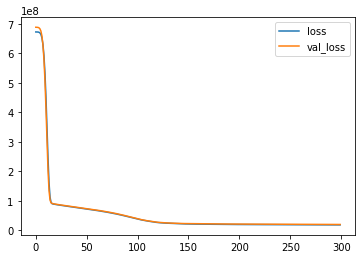

In [65]:
kayipVerisi.plot()

In [66]:
#Bakacagimiz ilk sey grafik dusup 0 a yaklasiyo mu-> Evet
#Ikincisi loss ve val_loss(dogrulama kaybi) beraber hareket
#ediyo mu(ozellikle sonlara dogru)-> Evet
#Eger epochs u 500 1000 gibi yuksek vereydik grafikte loss
#ve validation loss grafikte bir sure sonra ayrılmaya bas
#lardi. Bu da demektir ki veriler overfitting oluyo yani
#Cok ogreniyo

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
tahminDizisi = model.predict(x_test)

In [72]:
tahminDizisi #Bu fiyatlar bizim test datasiyla beraber olan fiyatlarimiz
#Ayni zamanda y_test icinde bunun dogru karsiliklari var

array([[22047.84 ],
       [23097.271],
       [24985.416],
       ...,
       [26250.559],
       [13206.086],
       [24646.98 ]], dtype=float32)

In [73]:
mean_absolute_error(y_test,tahminDizisi)

3159.40399403287

In [74]:
#Gercek fiyatlar ile tahmini degerler arasi ortalama 3159
#fiyat farki var

In [75]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [76]:
#3159/24074(mean price) = 0,131220 yani fiyattan %13 oraninda
#sapabiliyoruz. Bundan sonrasi bize kalmis. Boylece birakabiliriz
#Ya da geri donup veriyi daha fazla temizlemeye calisabiliriz
#Test size split size ı degistirebiliriz. epochs u arttirabilirz
#Noron sayimizş ve katman sayimizi degistirebiliriz
#Ama yine de overfitting e dikkat etmek gerekir
#veyahut da bir scatterplot cizdirip bakabiliriz
#Bir lineer seklindeyse az cok bu dogrudur diyebiliriz

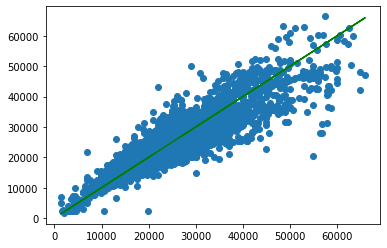

In [77]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g")

In [78]:
#tahmin verilerimiz ile test icin ayirdigimiz verilerimiz
#az cok bir lineer sekilde uyusuyo aslinda

In [89]:
df.iloc[2] #fiyat 65980

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [85]:
yeniArabaSeries = df.drop("price" ,axis = 1).iloc[2]
#Artik verisetimizde 65980 fiyatli verimiz yok

In [86]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [87]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [88]:
model.predict(yeniArabaSeries)

array([[61346.477]], dtype=float32)

In [ ]:
#Biz burda ne yaptik? Gercek bir veriyi veri setinden cikardik
#Sonra da bu veriyle bir tahminleme yaptik
#Acaba ne kadar yakin cikartiyo diye